## Descriptive Statistics, Outliers, and Axis

Plots can help you discover information from our data at first glance:
* Can tell you if the data is unimodal, bimodal, skewed or symmetrical (e.g. histogram)
* Allows us to detect outliers in data that might require further attention... or just to be ignored

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Allows to render plots inlie
%matplotlib inline

pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


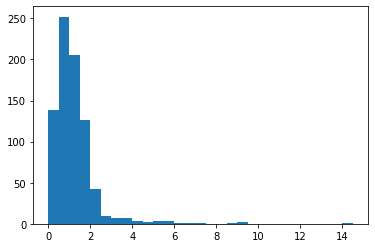

In [8]:
plt.hist(pokemon['height'], bins = bins);


(0, 6)

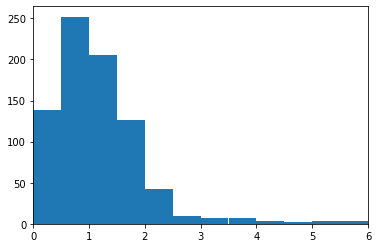

In [9]:
## Adjusting bin size and range for the x-axis

bins = np.arange(0, pokemon['height'].max() + 0.5, 0.5)
plt.hist(pokemon['height'], bins = bins);
plt.xlim((0,6))

Plot the above two graphs in a single figure of size 20 x 5 inches, side-by-side.

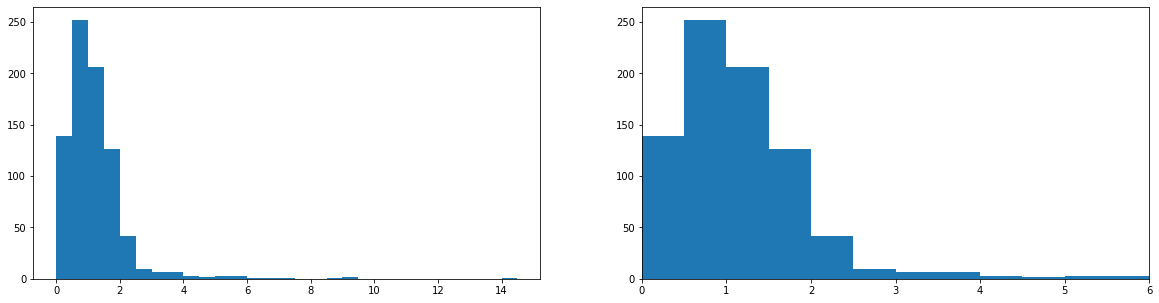

In [10]:
## Define figure size: matplotlib.pyplot.figure(figsize = [float, float])
## Add subplot: matplotlib.pyplot.subplot(int, int, index)
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
plt.hist(pokemon['height'], bins = bins);

plt.subplot(1,2,2)
bins = np.arange(0, pokemon['height'].max() + 0.5, 0.5)
plt.hist(pokemon['height'], bins = bins);
plt.xlim((0,6));

## Scales and Transformations


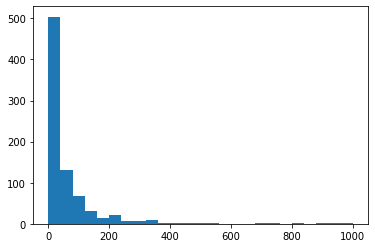

In [18]:
bins = np.arange(0, pokemon['weight'].max() + 40, 40)
plt.hist(data = pokemon, x = "weight", bins = bins);

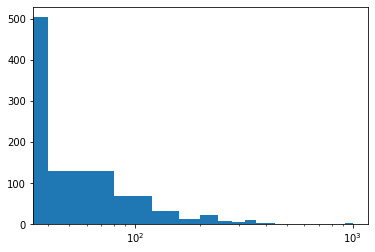

In [19]:
## Rather than limiting the axis, we will rescale it
plt.hist(data = pokemon, x = "weight", bins = bins);
plt.xscale('log')

In [21]:
## It doesn't look good, since the bins and labels need to be thus adjusted
np.log10(pokemon["weight"]).describe()

count    807.000000
mean       1.364366
std        0.670968
min       -1.000000
25%        0.954243
50%        1.431364
75%        1.799341
max        2.999957
Name: weight, dtype: float64

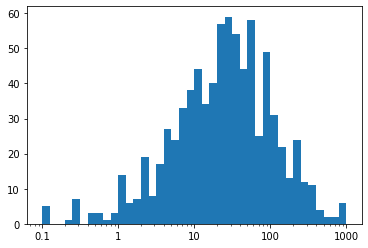

In [25]:
 bins = 10 ** np.arange(np.log10(pokemon["weight"]).min(), np.log10(pokemon["weight"]).max() + 0.1, 0.1)
plt.hist(data = pokemon, x = "weight", bins = bins);
plt.xscale('log');
# Generate the x-ticks you want to apply
ticks = [0.1, 1, 10, 100, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

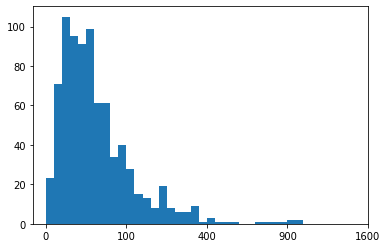

In [27]:
 ## Custom scaling
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));